## Knee plots for up to 2000 clusters

In [9]:
%pylab inline 
pylab.rcParams['figure.figsize'] = (15,12)
import numpy as np
import simplejson as json
import os
from gradutil import *

Populating the interactive namespace from numpy and matplotlib


/home/jousi/Documents/gradujose/env/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['maximum', 'indices', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
revenue, carbon, deadwood, ha = init_boreal()
n_revenue = nan_to_bau(revenue)
n_carbon = nan_to_bau(carbon)
n_deadwood = nan_to_bau(deadwood)
n_ha = nan_to_bau(ha)
revenue_norm = normalize(n_revenue.values)
carbon_norm = normalize(n_carbon.values)
deadwood_norm = normalize(n_deadwood.values)
ha_norm = normalize(n_ha.values)
ide = ideal(False)
nad = nadir(False)
opt = SolverFactory('cplex')
x = pd.concat((n_revenue, n_carbon, n_deadwood, n_ha), axis=1)
x_stack = np.dstack((n_revenue, n_carbon, n_deadwood, n_ha))
x_norm = normalize(x.values)
x_norm_stack = normalize(x_stack)

This again takes quite some time, because we have a lot of files with a lot of contents.

In [11]:
with open('optimizations/opt50_2001_50.json','r') as file:
    optimizations = json.loads(file.read())

In [12]:
new_optims = dict()
for nclust in optimizations.keys():
    new_optims[eval(nclust)] = dict()
    for seedn in optimizations[nclust].keys():
        new_optims[eval(nclust)][eval(seedn)] = dict()
        for name in optimizations[nclust][seedn].keys():
            new_optims[eval(nclust)][eval(seedn)][name] = dict()
            for key in optimizations[nclust][seedn][name].keys():
                new_optims[eval(nclust)][eval(seedn)][name][key] = float(optimizations[nclust][seedn][name][key])

In [13]:
new_optims[2000][2]

{'carbon': {'real': 3380073.9260009998, 'surrogate': 3712870.650439998},
 'deadwood': {'real': 103066.86692354298, 'surrogate': 105512.83864142983},
 'ha': {'real': 14903.560092590062, 'surrogate': 16060.498508061986},
 'revenue': {'real': 190061111.82269996, 'surrogate': 215018319.78349963}}

In [14]:
indices = []
real_revenue = []
real_carbon = []
real_deadwood = []
real_ha = []
surr_revenue = []
surr_carbon = []
surr_deadwood = []
surr_ha = []
for nclust in sorted(new_optims.keys()):
    r_rev = []
    r_car = []
    r_dea = []
    r_ha = []
    s_rev = []
    s_car = []
    s_dea = []
    s_ha = []
    for seedn in new_optims[nclust].keys():
        r_rev.append(new_optims[nclust][seedn]['revenue']['real'])
        r_car.append(new_optims[nclust][seedn]['carbon']['real'])
        r_dea.append(new_optims[nclust][seedn]['deadwood']['real'])
        r_ha.append(new_optims[nclust][seedn]['ha']['real'])
        s_rev.append(new_optims[nclust][seedn]['revenue']['surrogate'])
        s_car.append(new_optims[nclust][seedn]['carbon']['surrogate'])
        s_dea.append(new_optims[nclust][seedn]['deadwood']['surrogate'])
        s_ha.append(new_optims[nclust][seedn]['ha']['surrogate'])
    real_revenue.append(r_rev)
    real_carbon.append(r_car)
    real_deadwood.append(r_dea)
    real_ha.append(r_ha)
    surr_revenue.append(s_rev)
    surr_carbon.append(s_car)
    surr_deadwood.append(s_dea)
    surr_ha.append(s_ha)
    indices.append(nclust)
indices = np.array(indices)
real_revenue = np.array(real_revenue)
real_carbon = np.array(real_carbon)
real_deadwood = np.array(real_deadwood)
real_ha = np.array(real_ha)
surr_revenue = np.array(surr_revenue)
surr_carbon = np.array(surr_carbon)
surr_deadwood = np.array(surr_deadwood)
surr_ha = np.array(surr_ha)

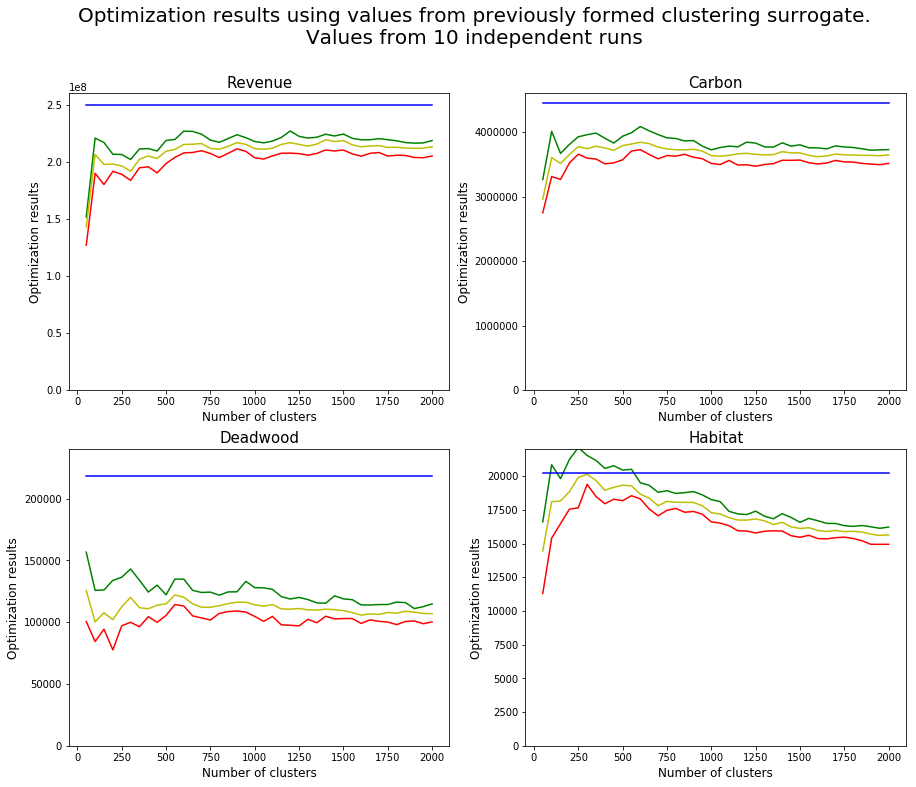

In [15]:
pylab.rcParams['figure.figsize'] = (15,12)

fig, ax = plt.subplots(2,2)
fig.suptitle('Optimization results using values from previously formed clustering surrogate.\nValues from 10 independent runs',
            fontsize=20)

maximum = 1000
data = np.array([[surr_revenue, surr_carbon], [surr_deadwood, surr_ha]])
names = np.array([['Revenue', 'Carbon'],['Deadwood', 'Habitat']])
optims = np.array([ideal(False)[:2], ideal(False)[2:]])
ymaxs = np.array([[2.6e+8,4.6e+6],[2.4e+5, 2.2e+4]])
for i in range(np.shape(ax)[0]):
    for j in range(np.shape(ax)[1]):
        ax[i,j].plot(indices[:maximum], np.max(data[i,j], axis=1)[:maximum], color='g')
        ax[i,j].plot(indices[:maximum], np.mean(data[i,j], axis=1)[:maximum], color='y')
        ax[i,j].plot(indices[:maximum], np.min(data[i,j], axis=1)[:maximum], color='r')
        ax[i,j].plot((min(indices[:maximum]), max(indices[:maximum])),(optims[i,j], optims[i,j]), color='b')
        ax[i,j].set_title(names[i,j], fontsize=15)
        ax[i,j].set_ylim(ymin=0, ymax=ymaxs[i,j])
        ax[i,j].set_xlabel('Number of clusters', fontsize=12)
        ax[i,j].set_ylabel('Optimization results', fontsize=12)

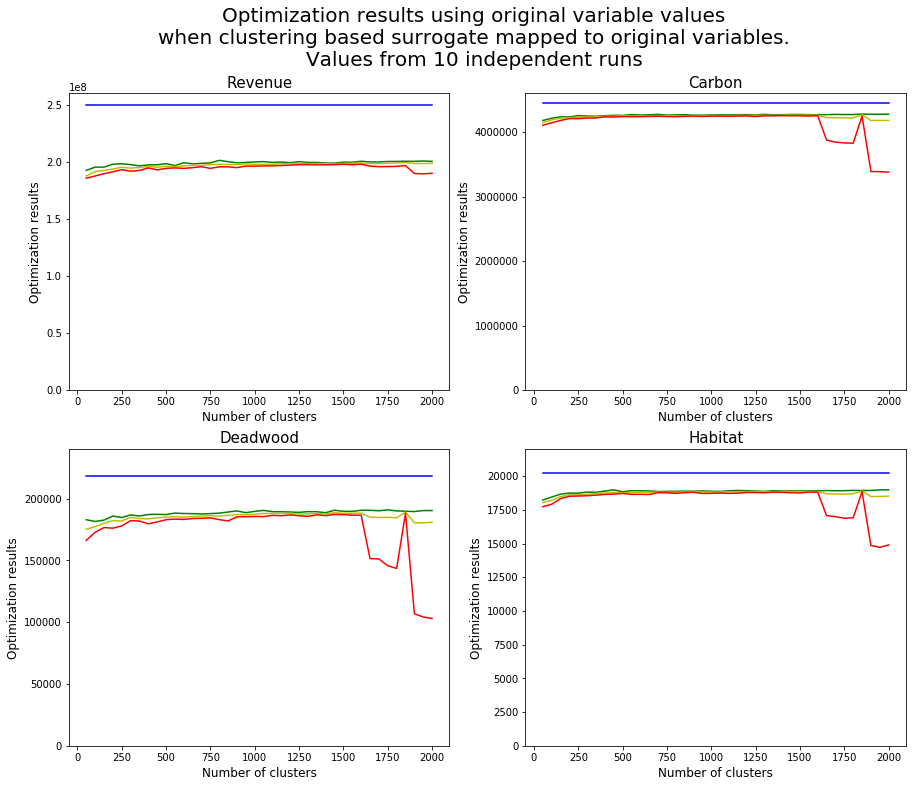

In [16]:
pylab.rcParams['figure.figsize'] = (15,12)

fig, ax = plt.subplots(2,2)
fig.suptitle('Optimization results using original variable values\nwhen clustering based surrogate mapped to original variables.\nValues from 10 independent runs',
            fontsize=20)

data = np.array([[real_revenue, real_carbon], [real_deadwood, real_ha]])
for i in range(np.shape(ax)[0]):
    for j in range(np.shape(ax)[1]):
        ax[i,j].plot(indices[:maximum], np.max(data[i,j], axis=1)[:maximum], color='g')
        ax[i,j].plot(indices[:maximum], np.mean(data[i,j], axis=1)[:maximum], color='y')
        ax[i,j].plot(indices[:maximum], np.min(data[i,j], axis=1)[:maximum], color='r')
        ax[i,j].plot((min(indices[:maximum]), max(indices[:maximum])),(optims[i,j], optims[i,j]), color='b')
        ax[i,j].set_title(names[i,j], fontsize=15)
        ax[i,j].set_ylim(ymin=0, ymax=ymaxs[i,j])
        ax[i,j].set_xlabel('Number of clusters', fontsize=12)
        ax[i,j].set_ylabel('Optimization results', fontsize=12)